In [4]:
import os
import json
import h5py
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
data = h5py.File("../datasets/fcnet_tabular_benchmarks/fcnet_naval_propulsion_data.hdf5", 'r')

In [6]:
configs = []
for k_str in data.keys():
    configs.append(json.loads(k_str))

In [18]:
df = pd.DataFrame(configs)
df

,activation_fn_1,activation_fn_2,batch_size,dropout_1,dropout_2,init_lr,lr_schedule,n_units_1,n_units_2
0,relu,relu,16,0.0,0.0,0.0005,const,128,128
1,relu,relu,16,0.0,0.0,0.0005,const,128,16
2,relu,relu,16,0.0,0.0,0.0005,const,128,256
3,relu,relu,16,0.0,0.0,0.0005,const,128,32
4,relu,relu,16,0.0,0.0,0.0005,const,128,512
...,...,...,...,...,...,...,...,...,...
62203,tanh,tanh,8,0.6,0.6,0.1000,cosine,64,16
62204,tanh,tanh,8,0.6,0.6,0.1000,cosine,64,256
62205,tanh,tanh,8,0.6,0.6,0.1000,cosine,64,32
62206,tanh,tanh,8,0.6,0.6,0.1000,cosine,64,512


In [35]:
data = df.stack()
data.name = "test"
data.reset_index()

,level_0,level_1,test
0,0,activation_fn_1,relu
1,0,activation_fn_2,relu
2,0,batch_size,16
3,0,dropout_1,0
4,0,dropout_2,0
...,...,...,...
559867,62207,dropout_2,0.6
559868,62207,init_lr,0.1
559869,62207,lr_schedule,cosine
559870,62207,n_units_1,64


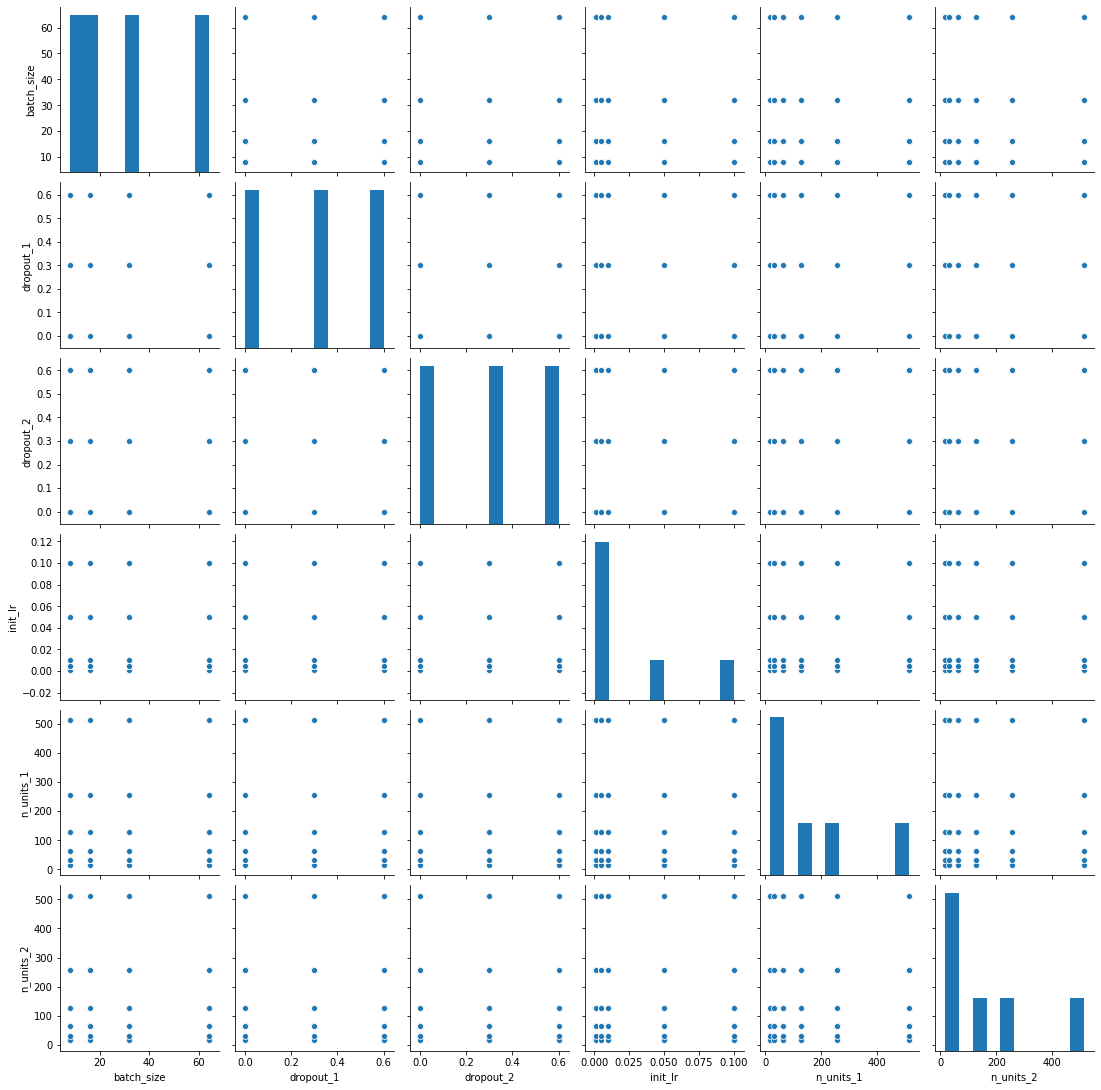

In [39]:
g = sns.pairplot(df)

In [9]:
data[k_str].keys()

<KeysViewHDF5 ['final_test_error', 'n_params', 'runtime', 'train_loss', 'train_mse', 'valid_loss', 'valid_mse']>

In [10]:
data[k_str]['final_test_error']

<HDF5 dataset "final_test_error": shape (4,), type "<f4">

In [15]:
data[k_str]['valid_mse']

<HDF5 dataset "valid_mse": shape (4, 100), type "<f4">